In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
CLEAN_PATH = "insurance_claims_cleaned_fixed.csv"
FEAT_PATH  = "insurance_claims_featured_fixed.csv"
DICT_PATH  = "data_dictionary_engineered.csv"

In [15]:
#Load cleaned and featured datasets
df_clean = pd.read_csv(CLEAN_PATH)
df_feat  = pd.read_csv(FEAT_PATH)

print("Cleaned dataset shape:", df_clean.shape)
print("Featured dataset shape:", df_feat.shape)

Cleaned dataset shape: (1000, 40)
Featured dataset shape: (1000, 58)


In [17]:
#Preview first rows of each dataset
print("Cleaned Dataset Preview")
display(df_clean.head())

print("\nFeatured Dataset Preview")
display(df_feat.head())

Cleaned Dataset Preview


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,flag_no_authorities_contacted
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,0
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,1



Featured Dataset Preview


,incident_date,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,zscore_total_claim,anomaly_zscore,leading_digit,benford_expected,benford_flag,rule_unusual_hour,claims_last_30d,rule_high_frequency,rule_suspicious_missing,iqr_flag
0,2015-01-07,172,33,100804,2012-02-24,IL,100/300,1000,1459.96,6000000,...,-0.419577,0,4,0.097,0,0,1.0,0,0,0
1,2015-02-23,91,26,101421,1999-10-19,IL,250/500,1000,1022.46,0,...,0.812407,0,7,0.058,0,0,1.0,0,1,0
2,2015-01-02,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,...,0.429662,0,6,0.067,0,0,1.0,0,0,0
3,2015-01-18,75,25,106186,2011-12-02,IL,500/1000,1000,1389.86,0,...,0.467557,0,6,0.067,0,0,1.0,0,1,0
4,2015-01-07,159,37,106873,1998-08-28,IL,500/1000,1000,894.40,0,...,0.664235,0,7,0.058,0,0,1.0,0,0,0


In [19]:
#Dataset info (column types, nulls, memory usage)
print("Cleaned Dataset Info")
df_clean.info()

print("\nFeatured Dataset Info")
df_feat.info()

Cleaned Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   months_as_customer             1000 non-null   int64  
 1   age                            1000 non-null   int64  
 2   policy_number                  1000 non-null   int64  
 3   policy_bind_date               1000 non-null   object 
 4   policy_state                   1000 non-null   object 
 5   policy_csl                     1000 non-null   object 
 6   policy_deductable              1000 non-null   int64  
 7   policy_annual_premium          1000 non-null   float64
 8   umbrella_limit                 1000 non-null   int64  
 9   insured_zip                    1000 non-null   int64  
 10  insured_sex                    1000 non-null   object 
 11  insured_education_level        1000 non-null   object 
 12  insured_occupation          

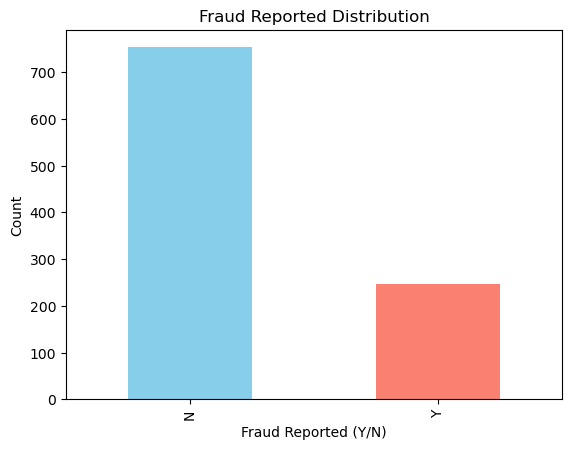

In [21]:
#Fraud Report Distribution
fraud_counts = df_feat["fraud_reported"].value_counts()

fraud_counts.plot(
    kind="bar",
    title="Fraud Reported Distribution",
    color=["skyblue", "salmon"]
)

plt.xlabel("Fraud Reported (Y/N)")
plt.ylabel("Count")
plt.show()

In [23]:
#Anomaly Detection Summary
print("Z-score anomalies:", df_feat["anomaly_zscore"].sum())
print("Benford anomalies:", df_feat["benford_flag"].sum())
print("IQR anomalies:", df_feat["iqr_flag"].sum())

Z-score anomalies: 0
Benford anomalies: 34
IQR anomalies: 1


In [27]:
#Rule-based Flags Summary
print("Unusual hour flags:", df_feat["rule_unusual_hour"].sum())
print("High frequency flags:", df_feat["rule_high_frequency"].sum())
print("Suspicious missing info flags:", df_feat["rule_suspicious_missing"].sum())

Unusual hour flags: 192
High frequency flags: 0
Suspicious missing info flags: 579


In [29]:
#Engineered Features Data Dictionary
data_dict = pd.read_csv(DICT_PATH)

print("=== Data Dictionary of Engineered Features ===")
display(data_dict)

=== Data Dictionary of Engineered Features ===


,field,description,type
0,incident_day_of_week,Day of week of incident,engineered
1,incident_month,Month number of incident,engineered
2,incident_hour_bin,Time-of-day bin (Late Night/Morning/Afternoon/...,engineered
3,customer_tenure_years,Customer tenure in years,engineered
4,days_since_last_claim,Days since prior claim (-1 = first claim),engineered
5,claim_mean,Mean of injury/property/vehicle/total claims,engineered
6,claim_std_dev,Std dev of injury/property/vehicle/total claims,engineered
7,claim_percentile_rank,Percentile rank of total claim amount,engineered
8,zscore_total_claim,Z-score of total claim amount,anomaly
9,anomaly_zscore,Flag: |Z|>3,anomaly_flag
